# Ethanol vs Gasoline Prices in Brazil

With the 20 years of flex cars in Brazil in 2023 and the concern for environmental issues and the need to mitigate pollution this study seeks to analyze the prices of Ethanol and Gasoline over the years and answer some questions.

In terms of price, is it worth it for consumers to choose ethanol?\
How the price of ethanol and gasoline has changed over the years?\
How much was the price of ethanol in regions and states in 2022?\
How much was the price ratio of ethanol and gasoline in the regions and states in 2022?\
What is the month with the lowest ethanol-gasoline price ratio in the cheapest states?\
Which cities of São Paulo had the best ethanol-gasoline price ratio in 2022?

data used: https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading and combining the data
ca = []
year = 2004
for i in range (19):
    for j in range (1,3):
        df_semester = pd.read_csv(f'ca-{year+i}-0{j}.csv', sep=';', encoding = "ISO-8859-1", low_memory=False)
        df_semester.columns.values[0] = 'Regiao - Sigla'
        ca.append(df_semester)
df = pd.concat(ca, ignore_index=True)
df                   

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,11/05/2004,"1,967","1,6623",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,11/05/2004,"0,899","0,6282",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,11/05/2004,"1,299","1,1704",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,10/05/2004,"1,85","1,67",R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,10/05/2004,"0,78","0,48",R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22214359,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,GASOLINA,30/12/2022,"5,04",NaN,R$ / litro,MAXSUL
22214360,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,DIESEL S10,30/12/2022,"6,19",NaN,R$ / litro,MAXSUL
22214361,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA ADITIVADA,30/12/2022,"5,31",NaN,R$ / litro,VIBRA ENERGIA
22214362,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA,30/12/2022,"5,11",NaN,R$ / litro,VIBRA ENERGIA


# Data Processing

In [3]:
#checking for null values
df.isnull().sum()

Regiao - Sigla              0
Estado - Sigla              0
Municipio                   0
Revenda                     0
CNPJ da Revenda             0
Nome da Rua                 0
Numero Rua              11913
Complemento          16224783
Bairro                  71114
Cep                         0
Produto                     0
Data da Coleta              1
Valor de Venda              1
Valor de Compra      11802379
Unidade de Medida           1
Bandeira                    1
dtype: int64

In [4]:
#selecting the collumns we want
df = df.iloc[:, [0,1,2,10,11,12]]

In [5]:
#renaming the columns and removing the null values
columns_names = {'Regiao - Sigla': 'Region', 'Estado - Sigla': 'State', 'Municipio': 'City', 'Produto': 'Fuel', 'Data da Coleta': 'Date', 'Valor de Venda': 'Price'}
df.rename(columns=columns_names, inplace=True)
df = df.dropna(subset=['Price','Date'])

C:\Users\lucas\AppData\Local\Temp\ipykernel_4496\3383265365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=columns_names, inplace=True)


In [6]:
#finding the unique values
df.nunique()

Region       5
State       27
City       698
Fuel         7
Date      4032
Price     6667
dtype: int64

In [7]:
#finding the fuels of the data
df.Fuel.unique()

array(['GASOLINA', 'ETANOL', 'DIESEL', 'GNV', 'DIESEL S50', 'DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [8]:
#selecting the fuels we want
fuels = ['GASOLINA', 'ETANOL']
df = df[df['Fuel'].isin(fuels)]
df.shape

(14147772, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14147772 entries, 0 to 22214363
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Region  object
 1   State   object
 2   City    object
 3   Fuel    object
 4   Date    object
 5   Price   object
dtypes: object(6)
memory usage: 755.6+ MB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].astype(float)
df.head()

C:\Users\lucas\AppData\Local\Temp\ipykernel_4496\2113487678.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Region,State,City,Fuel,Date,Price,Year,Month
0,SE,SP,GUARULHOS,GASOLINA,2004-11-05,1.967,2004,11
1,SE,SP,GUARULHOS,ETANOL,2004-11-05,0.899,2004,11
3,SE,SP,SOROCABA,GASOLINA,2004-10-05,1.850,2004,10
4,SE,SP,SOROCABA,ETANOL,2004-10-05,0.780,2004,10
6,CO,DF,BRASILIA,GASOLINA,2004-10-05,2.030,2004,10


# Exploring the data

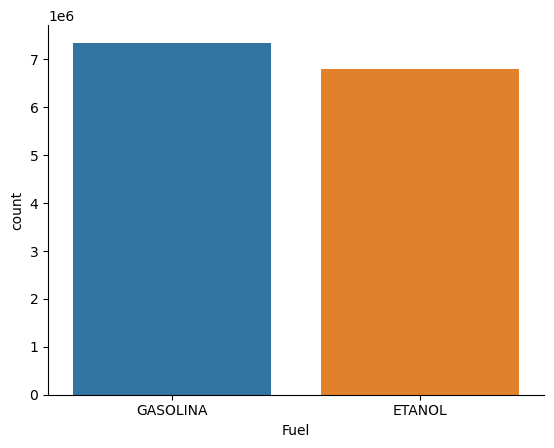

In [76]:
#verifying the quantity of data for each fuel
sns.countplot(data=df, x='Fuel');
sns.despine()
plt.show()

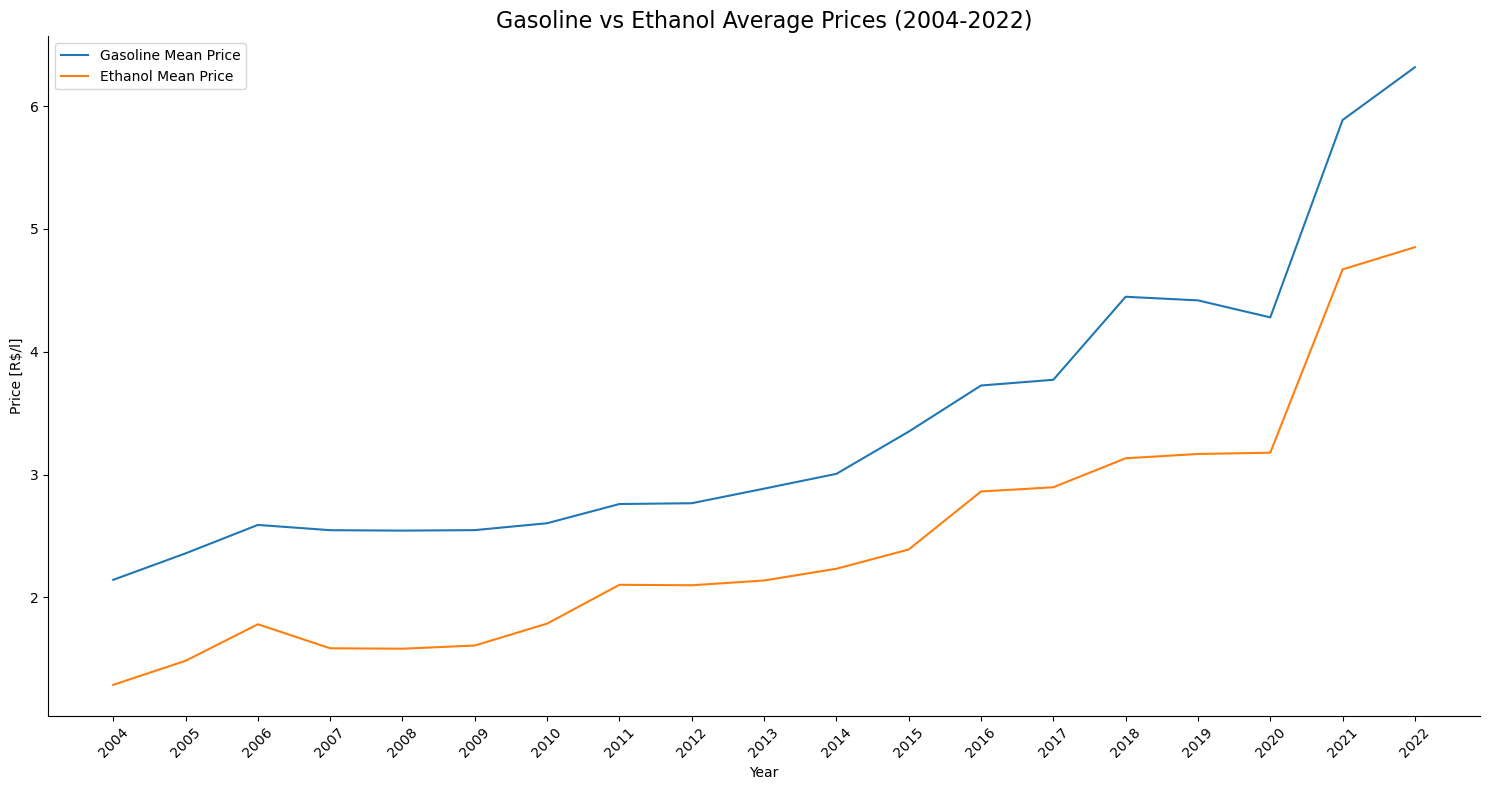

In [75]:
#plotting the average price of fuels over the years
gasoline_mean_prices_year = df[df['Fuel'] == 'GASOLINA'].groupby(df['Year'])['Price'].mean()
ethanol_mean_prices_year = df[df['Fuel'] == 'ETANOL'].groupby(df['Year'])['Price'].mean()

plt.figure(figsize=[15,8])
sns.lineplot(data=gasoline_mean_prices_year, label='Gasoline Mean Price');
sns.lineplot(data=ethanol_mean_prices_year, label='Ethanol Mean Price');

plt.xticks(gasoline_mean_prices_year.index, rotation=45);
plt.title('Gasoline vs Ethanol Average Prices (2004-2022)', fontsize=16)
plt.ylabel('Price [R$/l]')
plt.legend();
sns.despine()
plt.tight_layout()
plt.show()

We see that the prices are always following each other

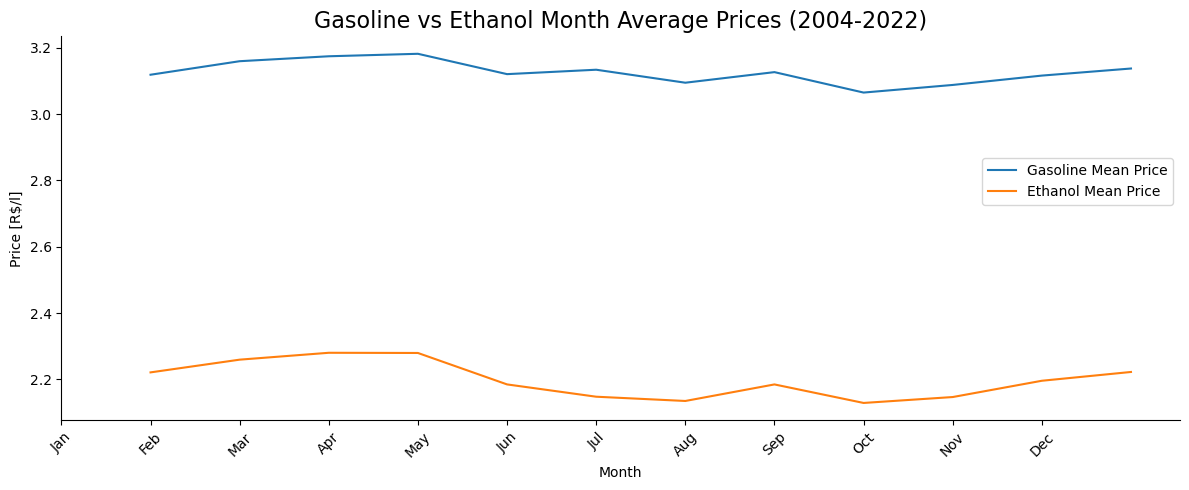

In [83]:
#plotting the 2004-2022 average price over the months
gasoline_mean_prices_month = df[df['Fuel'] == 'GASOLINA'].groupby(df['Month'])['Price'].mean()
ethanol_mean_prices_month = df[df['Fuel'] == 'ETANOL'].groupby(df['Month'])['Price'].mean()

plt.figure(figsize=[12,5])
sns.lineplot(data=gasoline_mean_prices_month, label='Gasoline Mean Price');
sns.lineplot(data=ethanol_mean_prices_month, label='Ethanol Mean Price');

plt.xticks(gasoline_mean_prices_month.index, rotation=45);
plt.title('Gasoline vs Ethanol Month Average Prices (2004-2022)', fontsize=16)
plt.ylabel('Price [R$/l]')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(0, 12), months)
plt.legend(bbox_to_anchor=(1, 0.7));
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_4496\869731703.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ethanol_order = region_mean_prices[state_mean_prices['Fuel'] == 'ETANOL'].sort_values(by='Price')['Region'].tolist()


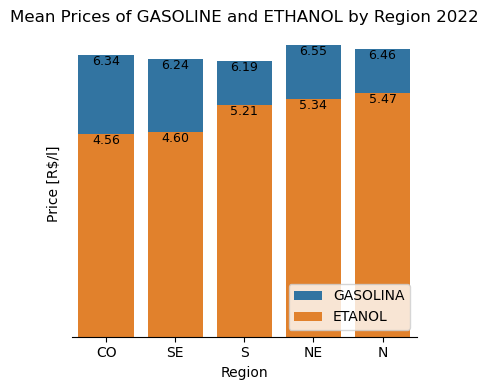

In [140]:
#plotting the mean prices by region
region_mean_prices = df[df['Year'] == 2022].groupby(['Region', 'Fuel'])['Price'].mean().reset_index().sort_values(by='Price', ascending=False)

ethanol_order = region_mean_prices[state_mean_prices['Fuel'] == 'ETANOL'].sort_values(by='Price')['Region'].tolist()

plt.figure(figsize=[4, 4])
ax = sns.barplot(data=region_mean_prices, x='Region', y='Price', hue='Fuel', dodge=False, order=ethanol_order)

plt.title('Mean Prices of GASOLINE and ETHANOL by Region 2022')
plt.ylabel('Price [R$/l]')
plt.legend(loc='lower right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.3),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

sns.despine(left=True)
plt.gca().set_yticklabels([])
plt.tick_params(axis='y', which='both', length=0)
plt.tight_layout()
plt.show()

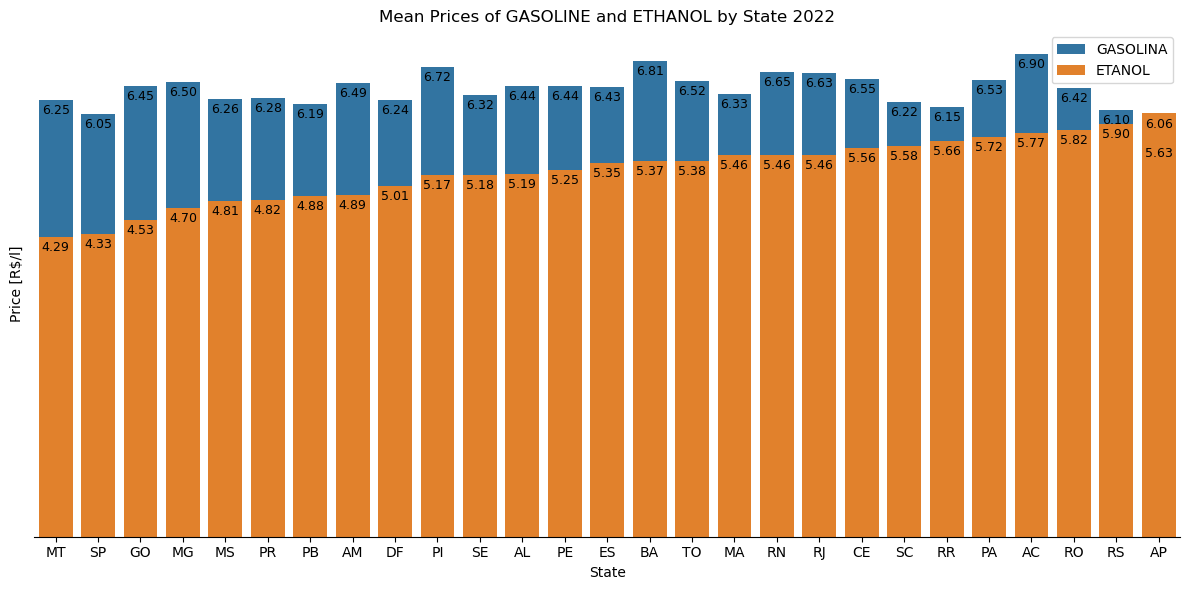

In [141]:
#plotting the mean prices by state
state_mean_prices = df[df['Year'] == 2022].groupby(['State', 'Fuel'])['Price'].mean().reset_index().sort_values(by='Price', ascending=False)

ethanol_order = state_mean_prices[state_mean_prices['Fuel'] == 'ETANOL'].sort_values(by='Price')['State'].tolist()

plt.figure(figsize=[12, 6])
ax = sns.barplot(data=state_mean_prices, x='State', y='Price', hue='Fuel', dodge=False, order=ethanol_order)

plt.title('Mean Prices of GASOLINE and ETHANOL by State 2022')
plt.ylabel('Price [R$/l]')
plt.legend()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.25),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

sns.despine(left=True)
plt.gca().set_yticklabels([])
plt.tick_params(axis='y', which='both', length=0)
plt.tight_layout()
plt.show()

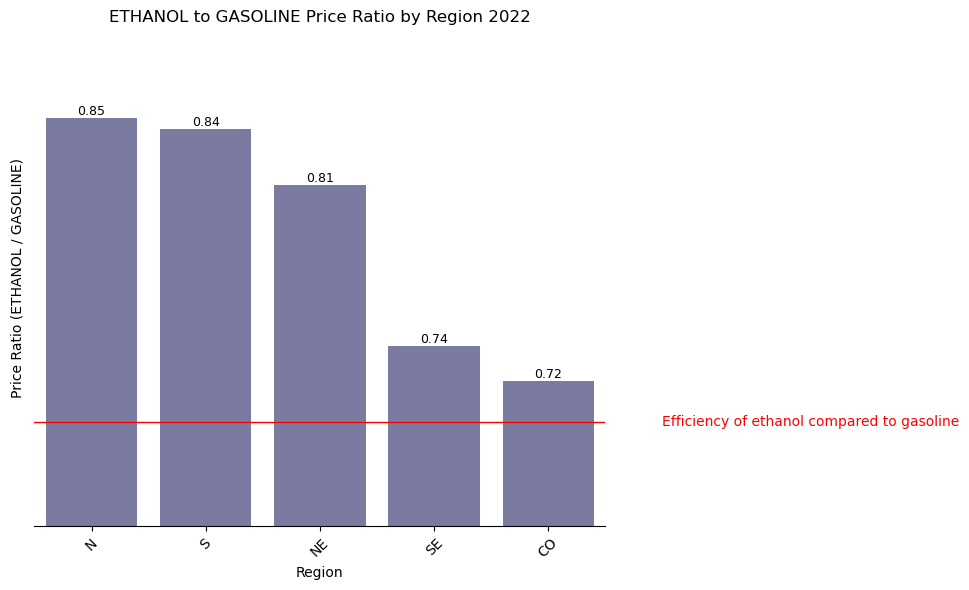

In [26]:
#plotting the price ratio by region
region_gasoline_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'GASOLINA')].groupby('Region')['Price'].mean()
region_ethanol_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'ETANOL')].groupby('Region')['Price'].mean()

region_price_ratio = region_ethanol_mean_prices / region_gasoline_mean_prices 
region_price_ratio = region_price_ratio.sort_values(ascending=False)

plt.figure(figsize=[10, 6])
sns.barplot(x=region_price_ratio.index, y=region_price_ratio.values, color='midnightblue', alpha=0.6)
sns.barplot(x=region_price_ratio.index, y=np.where(region_price_ratio.values < 0.7, region_price_ratio.values, 0),
            color='green', alpha=0.6)
plt.title('ETHANOL to GASOLINE Price Ratio by Region 2022')
plt.ylabel('Price Ratio (ETHANOL / GASOLINE)')
plt.xticks(rotation=45)
plt.axhline(y=0.7, color='red', linestyle='-', linewidth=1)
plt.text(len(region_price_ratio), 0.7, 'Efficiency of ethanol compared to gasoline', color='red', ha='left', va='center', fontsize=10)

for i, v in enumerate(region_price_ratio.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.ylim(0.65)

sns.despine(left=True)
plt.gca().set_yticklabels([])
plt.tick_params(axis='y', which='both', length=0)
plt.tight_layout()
plt.show()


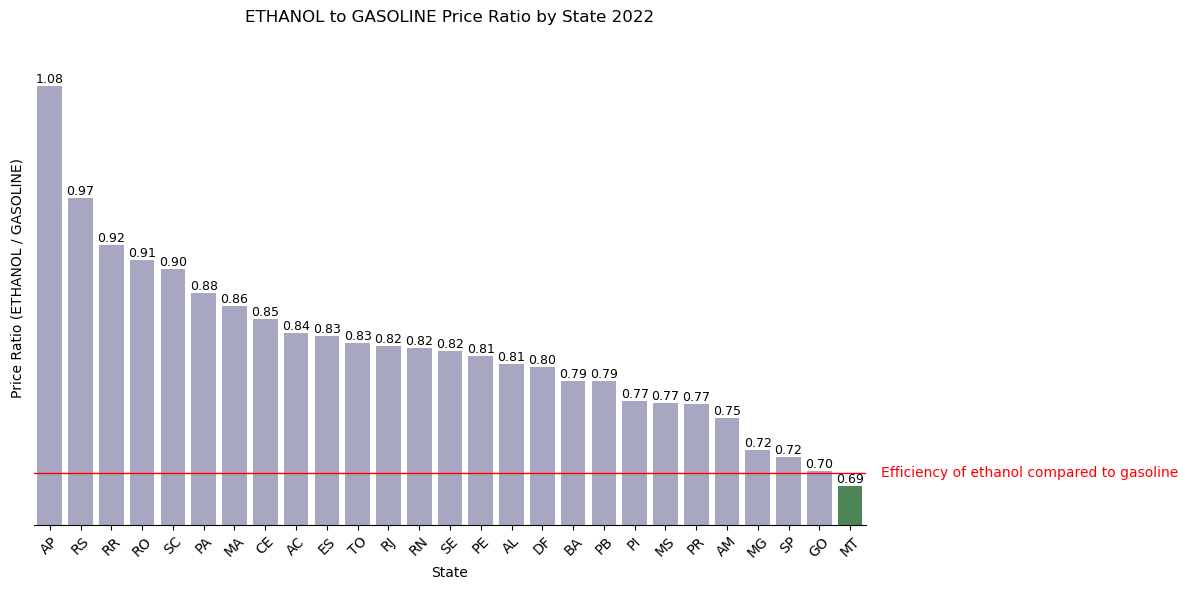

In [152]:
#plotting the price ratio by state
state_gasoline_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'GASOLINA')].groupby('State')['Price'].mean()
state_ethanol_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'ETANOL')].groupby('State')['Price'].mean()

state_price_ratio = state_ethanol_mean_prices / state_gasoline_mean_prices 
state_price_ratio = state_price_ratio.sort_values(ascending=False)

plt.figure(figsize=[12, 6])
sns.barplot(x=state_price_ratio.index, y=state_price_ratio.values, color='midnightblue', alpha=0.4)
sns.barplot(x=state_price_ratio.index, y=np.where(state_price_ratio.values < 0.7, state_price_ratio.values, 0),
            color='green', alpha=0.6)
plt.title('ETHANOL to GASOLINE Price Ratio by State 2022')
plt.ylabel('Price Ratio (ETHANOL / GASOLINE)')
plt.xticks(rotation=45)
plt.axhline(y=0.7, color='red', linestyle='-', linewidth=1)
plt.text(len(state_price_ratio), 0.7, 'Efficiency of ethanol compared to gasoline', color='red', ha='left', va='center', fontsize=10)

for i, v in enumerate(state_price_ratio.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.ylim(0.65)

sns.despine(left=True)
plt.gca().set_yticklabels([])
plt.tick_params(axis='y', which='both', length=0)
plt.tight_layout()
plt.show()


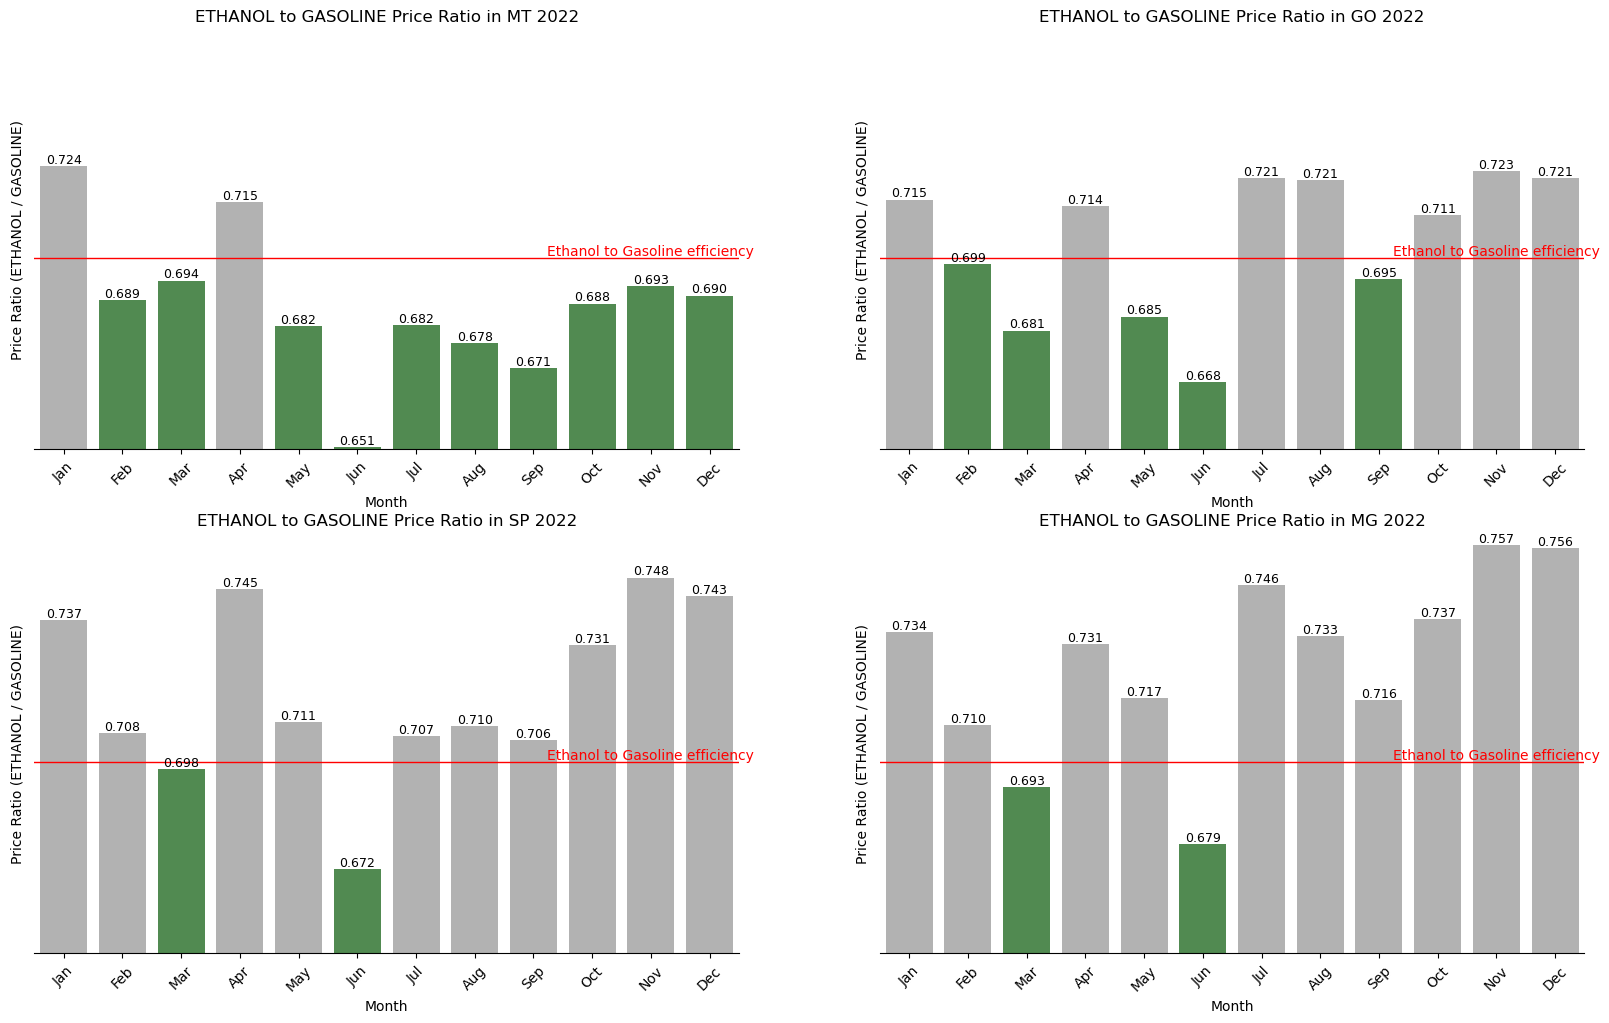

In [69]:
#plotting price ratio over the months for the best 4 states
top4_states = ['MT','GO','SP','MG']
count=1
plt.figure(figsize=[20, 12])
for i in top4_states:
    
    
    state_gasoline_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'GASOLINA')&(df['State'] == i)].groupby('Month')['Price'].mean()
    state_ethanol_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'ETANOL')&(df['State'] == i)].groupby('Month')['Price'].mean()

    state_price_ratio = state_ethanol_mean_prices / state_gasoline_mean_prices 


    
    plt.subplot(2,2,count)
    sns.barplot(x=state_price_ratio.index, y=state_price_ratio.values, color='grey', alpha=0.6)
    sns.barplot(x=state_price_ratio.index, y=np.where(state_price_ratio.values < 0.7, state_price_ratio.values, 0),
                color='green', alpha=0.6)
    plt.title(f'ETHANOL to GASOLINE Price Ratio in {i} 2022')
    plt.ylabel('Price Ratio (ETHANOL / GASOLINE)')
    plt.xticks(rotation=45)
    plt.axhline(y=0.7, color='red', linestyle='-', linewidth=1)
    plt.text(len(state_price_ratio)-2, 0.7, 'Ethanol to Gasoline efficiency', color='red', ha='center', va='bottom', fontsize=10)

    for i, v in enumerate(state_price_ratio.values):
        plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

    plt.ylim(0.65,0.76)

    plt.xticks(range(0, 12), months)
    sns.despine(left=True)
    plt.gca().set_yticklabels([])
    plt.tick_params(axis='y', which='both', length=0)
    count+=1
    
#plt.tight_layout()
plt.show()
    

In [49]:
#verifying if we have the same number of cities for both fuels
city_gasoline_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'GASOLINA')&(df['State'] == 'SP')].groupby('City')['Price'].mean()
city_ethanol_mean_prices = df[(df['Year'] == 2022)&(df['Fuel'] == 'ETANOL')&(df['State'] == 'SP')].groupby('City')['Price'].mean()
print(city_gasoline_mean_prices.size, city_ethanol_mean_prices.size) #verify if we have the same number of cities for both fuels

108 108


Note that SP has 645 cities and we only have data for 108 cities

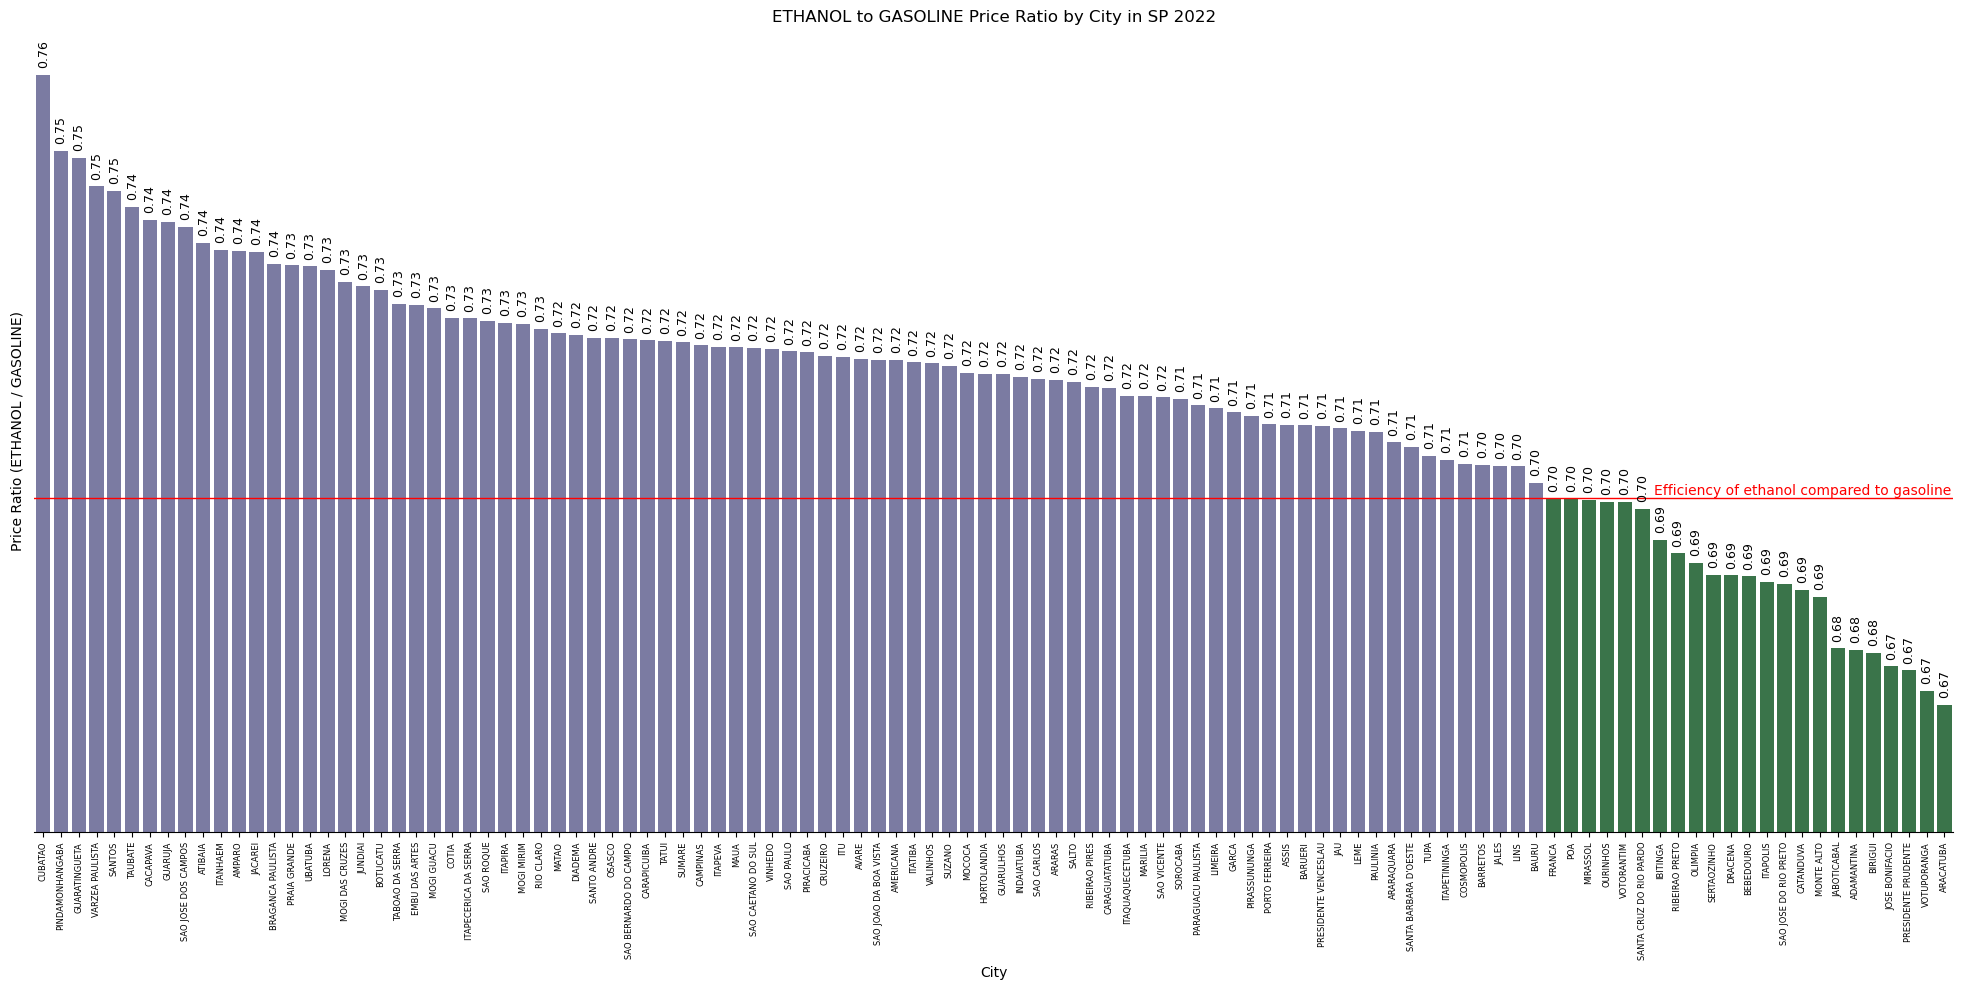

In [68]:
#plotting the price ratio for the cities of SP
city_price_ratio = city_ethanol_mean_prices / city_gasoline_mean_prices 
city_price_ratio = city_price_ratio.sort_values(ascending=False)

plt.figure(figsize=[20, 10])
sns.barplot(x=city_price_ratio.index, y=city_price_ratio.values, color='midnightblue', alpha=0.6)
sns.barplot(x=city_price_ratio.index, y=np.where(city_price_ratio.values < 0.7, city_price_ratio.values, 0),
            color='green', alpha=0.6)
plt.title('ETHANOL to GASOLINE Price Ratio by City in SP 2022')
plt.ylabel('Price Ratio (ETHANOL / GASOLINE)')
plt.xticks(rotation=90, fontsize=6)
plt.axhline(y=0.7, color='red', linestyle='-', linewidth=1)
plt.text(len(city_price_ratio)-9, 0.7, 'Efficiency of ethanol compared to gasoline', color='red', ha='center', va='bottom', fontsize=10)

for i, v in enumerate(city_price_ratio.values):
    plt.text(i, v+0.001, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=9)

plt.ylim(0.65, 0.77)

sns.despine(left=True)
plt.gca().set_yticklabels([])
plt.tick_params(axis='y', which='both', length=0)
plt.tight_layout()
plt.show()

In [125]:
#displaying the SP cities with better price ratio in 2022
for i in np.where(city_price_ratio.values < 0.7)[0][::-1]:
    print(city_price_ratio.index[i],f'{city_price_ratio.values[i]:.5f}')

ARACATUBA 0.66900
VOTUPORANGA 0.67119
PRESIDENTE PRUDENTE 0.67423
JOSE BONIFACIO 0.67483
BIRIGUI 0.67685
ADAMANTINA 0.67728
JABOTICABAL 0.67752
MONTE ALTO 0.68520
CATANDUVA 0.68625
SAO JOSE DO RIO PRETO 0.68715
ITAPOLIS 0.68747
BEBEDOURO 0.68829
DRACENA 0.68844
SERTAOZINHO 0.68848
OLIMPIA 0.69027
RIBEIRAO PRETO 0.69170
IBITINGA 0.69373
SANTA CRUZ DO RIO PARDO 0.69839
VOTORANTIM 0.69938
OURINHOS 0.69947
MIRASSOL 0.69976
POA 0.69984
FRANCA 0.69995


# Answering the most imporant question
In terms of price, is it worth it for consumers to choose ethanol?

Sadly, in most of cases no